## ARIMA Synthetic Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_days = 365 * 3   
dates = pd.date_range(start="2022-01-01", periods=n_days, freq="D")

In [3]:
products = [
    {"id": "P001", "name": "Paracetamol_500mg", "base": 50, "weekly_amp": 3, "trend": 0.01, "promo_period": 90},
    {"id": "P002", "name": "Cough_Syrup",       "base": 20, "weekly_amp": 6, "trend": 0.0,  "promo_period": 180},
    {"id": "P003", "name": "Vitamin_C",         "base": 15, "weekly_amp": 2, "trend": 0.02, "promo_period": 120},
    {"id": "P004", "name": "ORS_Solution",      "base": 8,  "weekly_amp": 1, "trend": 0.0,  "promo_period": 365},
    {"id": "P005", "name": "Antibiotic_A",      "base": 18, "weekly_amp": 1, "trend": 0.005,"promo_period": 200},
]

In [4]:
rows = []
for prod in products:
    base = prod["base"]
    weekly_amp = prod["weekly_amp"]
    trend_rate = prod["trend"]
    promo_period = prod["promo_period"]

    # small linear trend across the time period
    trend = np.linspace(0, trend_rate * n_days, n_days)

    # weekly seasonality: emulate slightly different weekday demands
    weekday = dates.dayofweek  # 0=Mon .. 6=Sun
    weekly_effect = weekly_amp * np.sin(2 * np.pi * weekday / 7)

    # occasional promotion spikes every promo_period days
    spikes = np.zeros(n_days)
    if promo_period:
        spikes[np.arange(0, n_days, promo_period)] = base * 0.6  # occasional big day

    # random noise
    noise = np.random.normal(loc=0.0, scale=max(2, base*0.08), size=n_days)

    # sales (ensure non-negative ints)
    sales = base + trend + weekly_effect + spikes + noise
    sales = np.round(np.clip(sales, 0, None)).astype(int)

    for d, s in zip(dates, sales):
        rows.append({
            "Date": d,
            "Product_ID": prod["id"],
            "Product_Name": prod["name"],
            "Sales_Qty": int(s),
        })

df = pd.DataFrame(rows)

In [5]:
print("Rows:", df.shape[0])

Rows: 5475


In [6]:
df.sample(10)

,Date,Product_ID,Product_Name,Sales_Qty
755,2024-01-26,P001,Paracetamol_500mg,58
1693,2023-08-22,P002,Cough_Syrup,24
1367,2022-09-30,P002,Cough_Syrup,18
4331,2024-11-12,P004,ORS_Solution,9
2580,2023-01-26,P003,Vitamin_C,23
3406,2022-05-02,P004,ORS_Solution,4
1716,2023-09-14,P002,Cough_Syrup,23
2878,2023-11-20,P003,Vitamin_C,29
5443,2024-11-29,P005,Antibiotic_A,19
4601,2022-08-10,P005,Antibiotic_A,21


In [7]:
df.shape

(5475, 4)

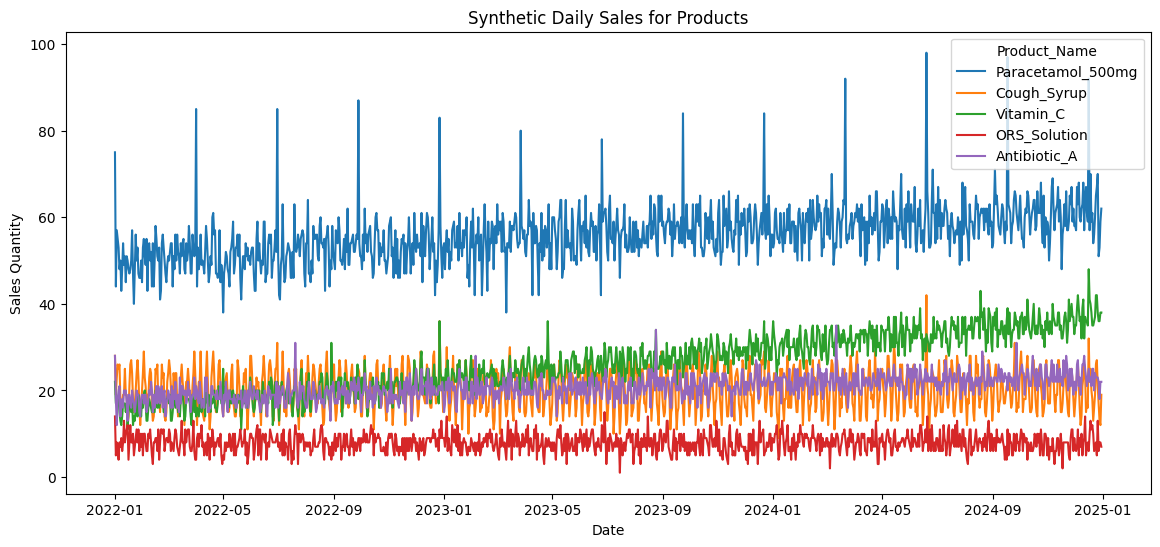

In [8]:
import seaborn as sns
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x="Date", y="Sales_Qty", hue="Product_Name")
plt.title("Synthetic Daily Sales for Products")
plt.xlabel("Date")
plt.ylabel("Sales Quantity")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_14456\2236245755.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.groupby([pd.Grouper(key="Date", freq="M"), "Product_Name"])["Sales_Qty"].sum().reset_index()


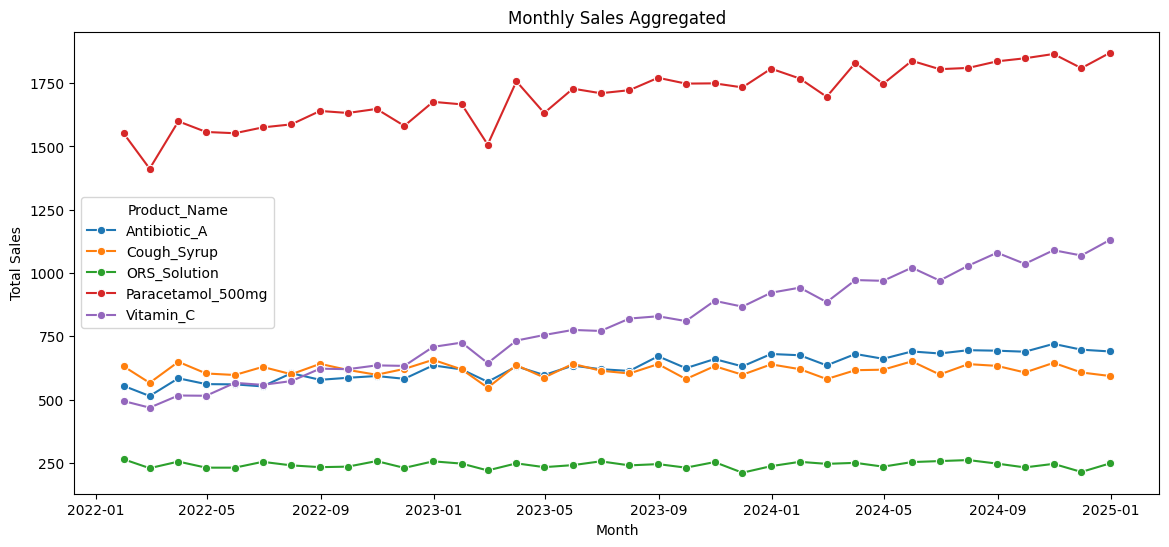

In [9]:
df_monthly = df.groupby([pd.Grouper(key="Date", freq="M"), "Product_Name"])["Sales_Qty"].sum().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=df_monthly, x="Date", y="Sales_Qty", hue="Product_Name", marker="o")
plt.title("Monthly Sales Aggregated")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5475 entries, 0 to 5474
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5475 non-null   datetime64[ns]
 1   Product_ID    5475 non-null   object        
 2   Product_Name  5475 non-null   object        
 3   Sales_Qty     5475 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 171.2+ KB


In [11]:
df['Product_Name'].unique()

array(['Paracetamol_500mg', 'Cough_Syrup', 'Vitamin_C', 'ORS_Solution',
       'Antibiotic_A'], dtype=object)

In [12]:
train_df = df[df["Date"] <= "2024-11-30"]
test_df  = df[(df["Date"] >= "2024-12-01") & (df["Date"] <= "2024-12-30")]

In [13]:
train_df.shape, test_df.shape

((5325, 4), (150, 4))

In [16]:
print(test_df['Date'].min(), test_df['Date'].max())

2024-12-01 00:00:00 2024-12-30 00:00:00


In [ ]:
train_df.to_csv("C:/Users/Admin/NIYOJAN/Data/Synthetic/Training/arima_data.csv", index=False)

In [ ]:
test_df.to_csv("C:/Users/Admin/NIYOJAN/Data/Synthetic/Test/arima_data.csv", index=False)